# Python Assignment 3

⏱⏱⏱**Due: 12/01/2024 11:59:59 PM** ⏱⏱⏱

Please submit your notebook files and upload them to your Git repository. Don't forget to include a link to your Git repository when submitting this file on Brightspace.

Total points: 150 (equivalent to 15 points after conversion)

I have provided some guidance in comments to help you through the steps, but feel free to approach this in a different way if you prefer. **Feel free to disregard my comments if you have an alternative approach in mind.**

## 5. Image Binary Classification (30 pts)



For Question 5 of the Python project, please complete it using two distinct Jupyter Notebook scripts. This entails using one notebook for the original dataset and another for the modified dataset. Consequently, you will be submitting a total of three .ipynb files as part of your Python project, ensuring clear separation and organization of your work.

Your tasks:
1. Your first task is to re-implement the classification model that was covered in our class. Please start from scratch and write the code independently. You can refer to the original code provided on Brightspace if you encounter any difficulties, but try to write the code on your own to reinforce your understanding.

2. After implementing the classification model, **report the indices of all the images in the test set for which the model's predictions are incorrect.** To maintain consistency with Python’s convention, please begin your indexing with 0. Additionally, **display the images of 4 of these failed cases for visual examination (you can display more if you like)**. This analysis might help us identify instances where the model is struggling in some applications.

3. Now you will modify the code to treat the dataset differently. The first 160 images plus the last digit of your Student ID will constitute the new training set, while the remaining images in the original training set will be your new test set. There are 209 images in the original training set. For example, if your ID ends with 0, the first 160 images will form your training set, and the remaining 49 images will be part of your test set. The test dataset is discarded and no longer used. Re-train the model using this modified dataset and **report the training and test accuracies**. Additionally, **provide the indices of all the images in the test set for which the model's predictions are incorrect. Display 4 of these misclassified images for further examination.**

By completing these tasks, you'll gain valuable insights into the classification model's performance and its behavior under different training and testing conditions.


  Datasets: [train]: train_catvnoncat.h5, [test]: test_catvnoncat.h5

In [3]:
import h5py
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt


# import train data
with h5py.File('train_catvnoncat.h5', 'r') as file:
    x = file['train_set_x'][:]
    y = file['train_set_y'][:]
    print(x.shape, y.shape)



x = torch.tensor(x.reshape(x.shape[0], -1), dtype=torch.float32)  # flatten the image
y = torch.tensor(y, dtype=torch.long)     # binary class: 0 vs. 1
x_train = x[:160+1] # split according to sbu id = 1
y_train = y[:160+1]
x_test = x[160+1:]
y_test = y[160+1:]
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(209, 64, 64, 3) (209,)
torch.Size([161, 12288]) torch.Size([161])
torch.Size([48, 12288]) torch.Size([48])


In [4]:
# define deep feedforward nn
class DeepNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(DeepNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

In [5]:
# define train dataloader with batch size of 64
batch_size = 64
train_data = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)

# create the model
input_size = x_train.shape[1]
hidden_size = 256
output_size = 1
model = DeepNN(input_size, hidden_size, output_size)
criterion = nn.BCEWithLogitsLoss() # binary class entropy loss with logit
optimizer = optim.Adam(model.parameters(), lr=0.01) # adam optimizer
# train the model
epochs = 100
for epoch in range(epochs):
    model.train()
    losses = 0 # track loss for each epoch
    for inputs, labels in train_loader:
        optimizer.zero_grad() # zero gradient
        outputs = model(inputs) # forward pass
        loss = criterion(outputs, labels.float().view(-1,1)) # calculate loss
        loss.backward() # back propagation
        optimizer.step()
        losses += loss.item()
    if epoch % 10 == 0 or epoch == epochs -1:
      print("At Epoch ", epoch, " the loss is: ", losses/len(train_loader))

At Epoch  0  the loss is:  5750.927681485812
At Epoch  10  the loss is:  4.623729109764099
At Epoch  20  the loss is:  1.1819748878479004
At Epoch  30  the loss is:  0.6232413649559021
At Epoch  40  the loss is:  0.5855101545651754
At Epoch  50  the loss is:  0.5201393365859985
At Epoch  60  the loss is:  0.5156014362970988
At Epoch  70  the loss is:  0.4308084746201833
At Epoch  80  the loss is:  0.3768427570660909
At Epoch  90  the loss is:  0.3085970679918925
At Epoch  99  the loss is:  0.23449320097764334


In [6]:
# compute train and test accuracy
y_train = y_train.numpy()
with torch.no_grad():
    pred_proba = model(x_train)
    predictions_train = (pred_proba > 0.5).long().squeeze().numpy()
    accuracy = np.mean(predictions_train == y_train)
    print(f'Training Accuracy: {accuracy:.4f}')
y_test = y_test.numpy()
with torch.no_grad():
    pred_proba = model(x_test)
    predictions_test = (pred_proba > 0.5).long().squeeze().numpy()
    accuracy = np.mean(predictions_test == y_test)
    print(f'Test Accuracy: {accuracy:.4f}')

Training Accuracy: 0.9565
Test Accuracy: 0.5625


Indices of incorrect predictions are :  [ 2  3  5  6  8  9 10 11 14 16 18 19 22 24 31 34 35 36 39 41 43]


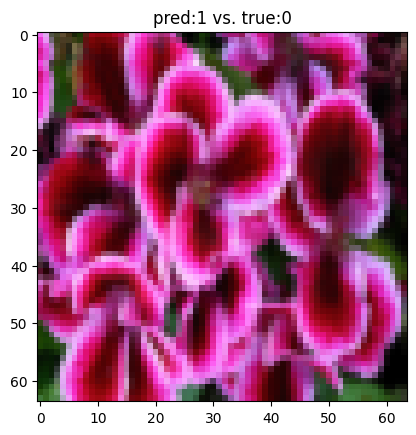

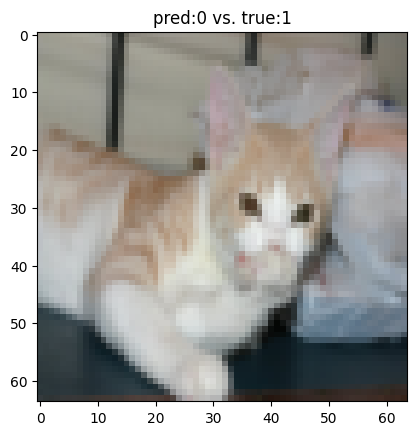

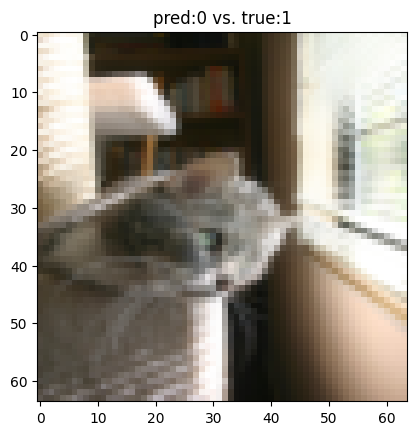

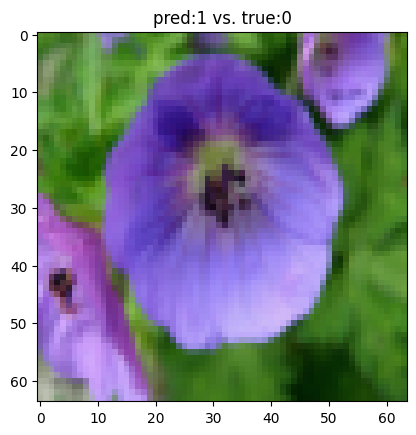

In [7]:
# report the indices of all the images in the test set for which the model's predictions are incorrect.
incorrect = np.arange(len(y_test))[predictions_test!=y_test]
print('Indices of incorrect predictions are : ', incorrect)
# display the images of 4 of these failed cases for visual examination
x_test_reshaped = x_test.reshape(-1,64,64,3).long()
for i in incorrect[:4]:
  plt.imshow(x_test_reshaped[i])
  plt.title('pred:'+str(predictions_test[i])+' vs. true:'+str(y_test[i]))
  plt.show()

Compared to original dataset, the model performs better on the modified dataset.